In [2]:
import random as aleas  # pour generer des nombres aleatoires et +
import matplotlib.pyplot as plt # pour les graphiques
from scipy.signal import freqz   # pour avoir le TF de l'autocorrelation
import numpy as np #pour gerer les moyennes + covariances +++

import csv
import pandas as pd

In [3]:
data = []
title_name = []
cpt = 0
with open('smallcrime.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)

    fieldnames = reader.fieldnames

    for row in reader:
        if(cpt != 0):
            cpt+=1
        else:
            data.append(row)
print(data)


[{'INCIDENT_NUMBER': 'I182080058', 'OFFENSE_CODE': '02403', 'OFFENSE_CODE_GROUP': 'Disorderly Conduct', 'OFFENSE_DESCRIPTION': 'DISTURBING THE PEACE', 'DISTRICT': 'E18', 'REPORTING_AREA': '495', 'SHOOTING': '', 'OCCURRED_ON_DATE': '2018-10-03 20:13:00', 'YEAR': '2018', 'MONTH': '10', 'DAY_OF_WEEK': 'Wednesday', 'HOUR': '20', 'UCR_PART': 'Part Two', 'STREET': 'ARLINGTON ST', 'Lat': '42.26260773', 'Long': '-71.12118637', 'Location': '(42.26260773, -71.12118637)'}, {'INCIDENT_NUMBER': 'I182080053', 'OFFENSE_CODE': '03201', 'OFFENSE_CODE_GROUP': 'Property Lost', 'OFFENSE_DESCRIPTION': 'PROPERTY - LOST', 'DISTRICT': 'D14', 'REPORTING_AREA': '795', 'SHOOTING': '', 'OCCURRED_ON_DATE': '2018-08-30 20:00:00', 'YEAR': '2018', 'MONTH': '8', 'DAY_OF_WEEK': 'Thursday', 'HOUR': '20', 'UCR_PART': 'Part Three', 'STREET': 'ALLSTON ST', 'Lat': '42.35211146', 'Long': '-71.13531147', 'Location': '(42.35211146, -71.13531147)'}, {'INCIDENT_NUMBER': 'I182080052', 'OFFENSE_CODE': '02647', 'OFFENSE_CODE_GROUP'

In [ ]:
# How has crime changed over the years?
# Is it possible to predict where or when a crime will be committed?
# Which areas of the city have evolved over this time span?
# In which area most crimes are committed?

In [44]:
#Analyse temporelle (année, mois)
year2015 = []
year2016 = []
year2017 = []
year2018 = []
years = [year2015,year2016,year2017,year2018]
for c in data:
    if(c["YEAR"] == "2015"):
        year2015.append(c)
    elif(c["YEAR"] == "2016"):
        year2016.append(c)
    elif(c["YEAR"] == "2017"):
        year2017.append(c)
    elif(c["YEAR"] == "2018"):
        year2018.append(c)

#print(year2018)

nb_crime2015 = len(year2015)
nb_crime2016 = len(year2016)
nb_crime2017 = len(year2017)
nb_crime2018 = len(year2018)

nb_crime = [nb_crime2015, nb_crime2016, nb_crime2017,nb_crime2018]

years_nb = [2015,2016,2017,2018]
crime_year = {}
for y in years_nb:
    crime_year[str(y)] = nb_crime[years_nb.index(y)]

print(crime_year)

    



{'2015': 0, '2016': 0, '2017': 4, '2018': 1995}


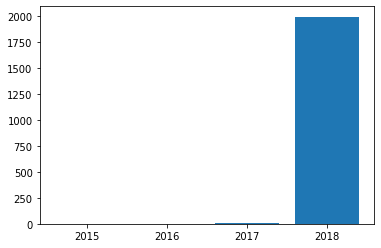

In [52]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.bar(crime_year.keys(), crime_year.values())
plt.show()

In [105]:
#Analyse par district
def get_crime_district(data):
    crime_district = {}
    districts = {}
    for c in data:
        if(c["DISTRICT"] != ""):
            if(not c["DISTRICT"] in crime_district):
                crime_district[c["DISTRICT"]] = 0
                districts[c["DISTRICT"]] = []
            crime_district[c["DISTRICT"]] += 1
            districts[c["DISTRICT"]].append(c)
    crime_district = {k: v for k, v in sorted(crime_district.items(), key=lambda item: item[1])}
    return crime_district, districts

crime_district, districts = get_crime_district(data)

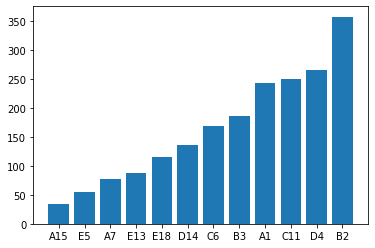

In [89]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.bar(crime_district.keys(), crime_district.values())
plt.show()

In [137]:
#Analyse par types (Offense Code group)
def get_5_most_crime_type(data):
    list_top_crime = []
    crime_type = {}

    top_5 = {}

    for d in data:
        if d["OFFENSE_CODE_GROUP"] in crime_type:
            crime_type[d["OFFENSE_CODE_GROUP"]] += 1
        else:
            crime_type[d["OFFENSE_CODE_GROUP"]] = 1
        
    crime_type = {k: v for k, v in sorted(crime_type.items(), key=lambda item: item[1], reverse = True)}

    top5_crime_type = dict(list(crime_type.items())[:5])

    for keys in top5_crime_type.keys():
        top_5[keys] = []

    for d in data:
        if d["OFFENSE_CODE_GROUP"] in top_5:
            top_5[d["OFFENSE_CODE_GROUP"]].append(d)

    return top5_crime_type, top_5

top5_crime_type, top_5 = get_5_most_crime_type(data)


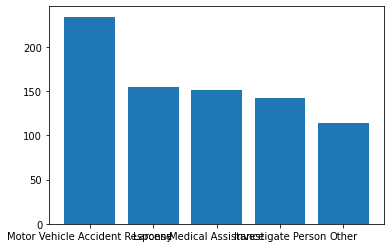

In [81]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

top5_crime_type, top_5 = get_5_most_crime_type(data)

plt.bar(top5_crime_type.keys(), top5_crime_type.values())
plt.show()

In [106]:
#Analyse des crimes par district en fonction des années
crime_district_annee = []
for ys in years:
    crime_district, districts = get_crime_district(ys)
    crime_district_annee.append(crime_district)

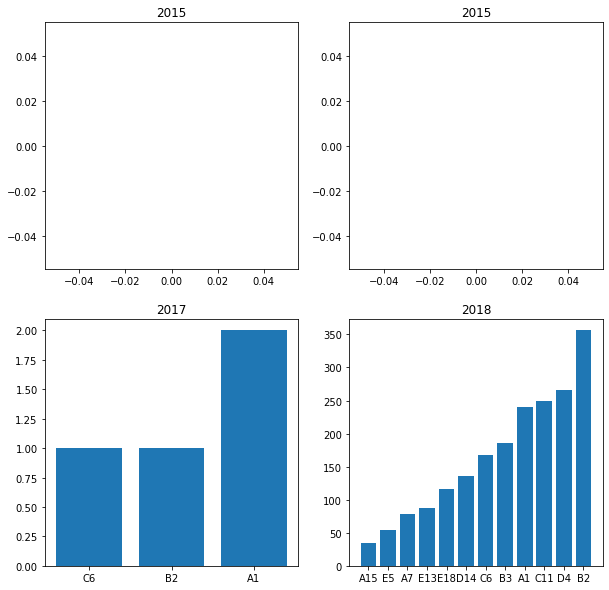

In [107]:
fig = plt.figure(figsize = (10,10))
fig.patch.set_facecolor('xkcd:white')
cpt = 0
for cda in crime_district_annee:
    cpt += 1
    ax = plt.subplot(2,2,cpt)
    ax = plt.bar(cda.keys(), cda.values())
    ax = plt.title(years_nb[crime_district_annee.index(cda)])

plt.show()

In [140]:
#Analyse des types de crimes en fonction des années
crime_type_annee = []
for ys in years:
    top5_crime_type, top_5 = get_5_most_crime_type(ys)
    crime_type_annee.append(top5_crime_type)

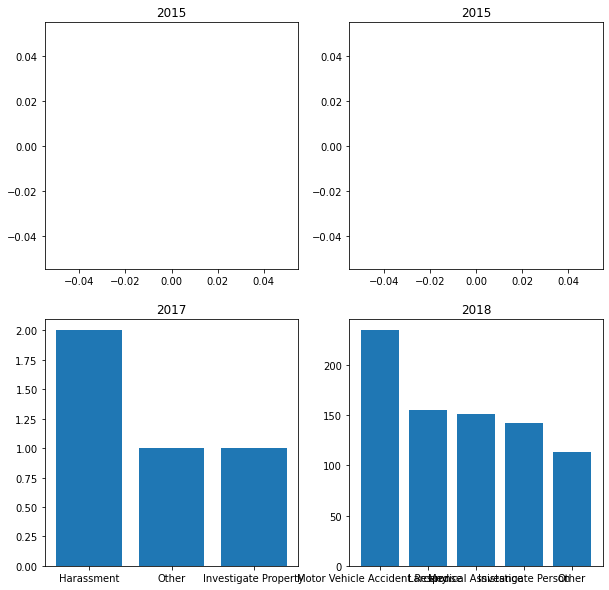

In [141]:
fig = plt.figure(figsize = (10,10))
fig.patch.set_facecolor('xkcd:white')
cpt = 0

for cda in crime_type_annee:
    cpt += 1
    ax = plt.subplot(2,2,cpt)
    ax = plt.bar(cda.keys(), cda.values())
    ax = plt.title(years_nb[crime_type_annee.index(cda)])

plt.show()

In [143]:
#Analyse des types d'infractions par district
crime_type_district = []
crime_district, districts = get_crime_district(data)
for ds in districts.values():
    top5_crime_type, top_5 = get_5_most_crime_type(ds)
    crime_type_district.append(top5_crime_type)
print(crime_type_district)

[{'Motor Vehicle Accident Response': 20, 'Investigate Person': 13, 'Medical Assistance': 9, 'Investigate Property': 7, 'Simple Assault': 6}, {'Motor Vehicle Accident Response': 23, 'Medical Assistance': 20, 'Investigate Person': 12, 'Investigate Property': 11, 'Towed': 8}, {'Motor Vehicle Accident Response': 39, 'Other': 32, 'Vandalism': 25, 'Investigate Person': 25, 'Verbal Disputes': 22}, {'Larceny': 36, 'Medical Assistance': 24, 'Motor Vehicle Accident Response': 24, 'Investigate Property': 18, 'Drug Violation': 17}, {'Drug Violation': 7, 'Larceny': 7, 'Simple Assault': 6, 'Investigate Person': 6, 'Motor Vehicle Accident Response': 6}, {'Motor Vehicle Accident Response': 35, 'Vandalism': 33, 'Medical Assistance': 23, 'Other': 20, 'Verbal Disputes': 19}, {'Larceny': 51, 'Investigate Person': 25, 'Motor Vehicle Accident Response': 24, 'Towed': 16, 'Other': 13}, {'Motor Vehicle Accident Response': 14, 'Medical Assistance': 13, 'Towed': 9, 'Simple Assault': 7, 'Drug Violation': 5}, {'Ve

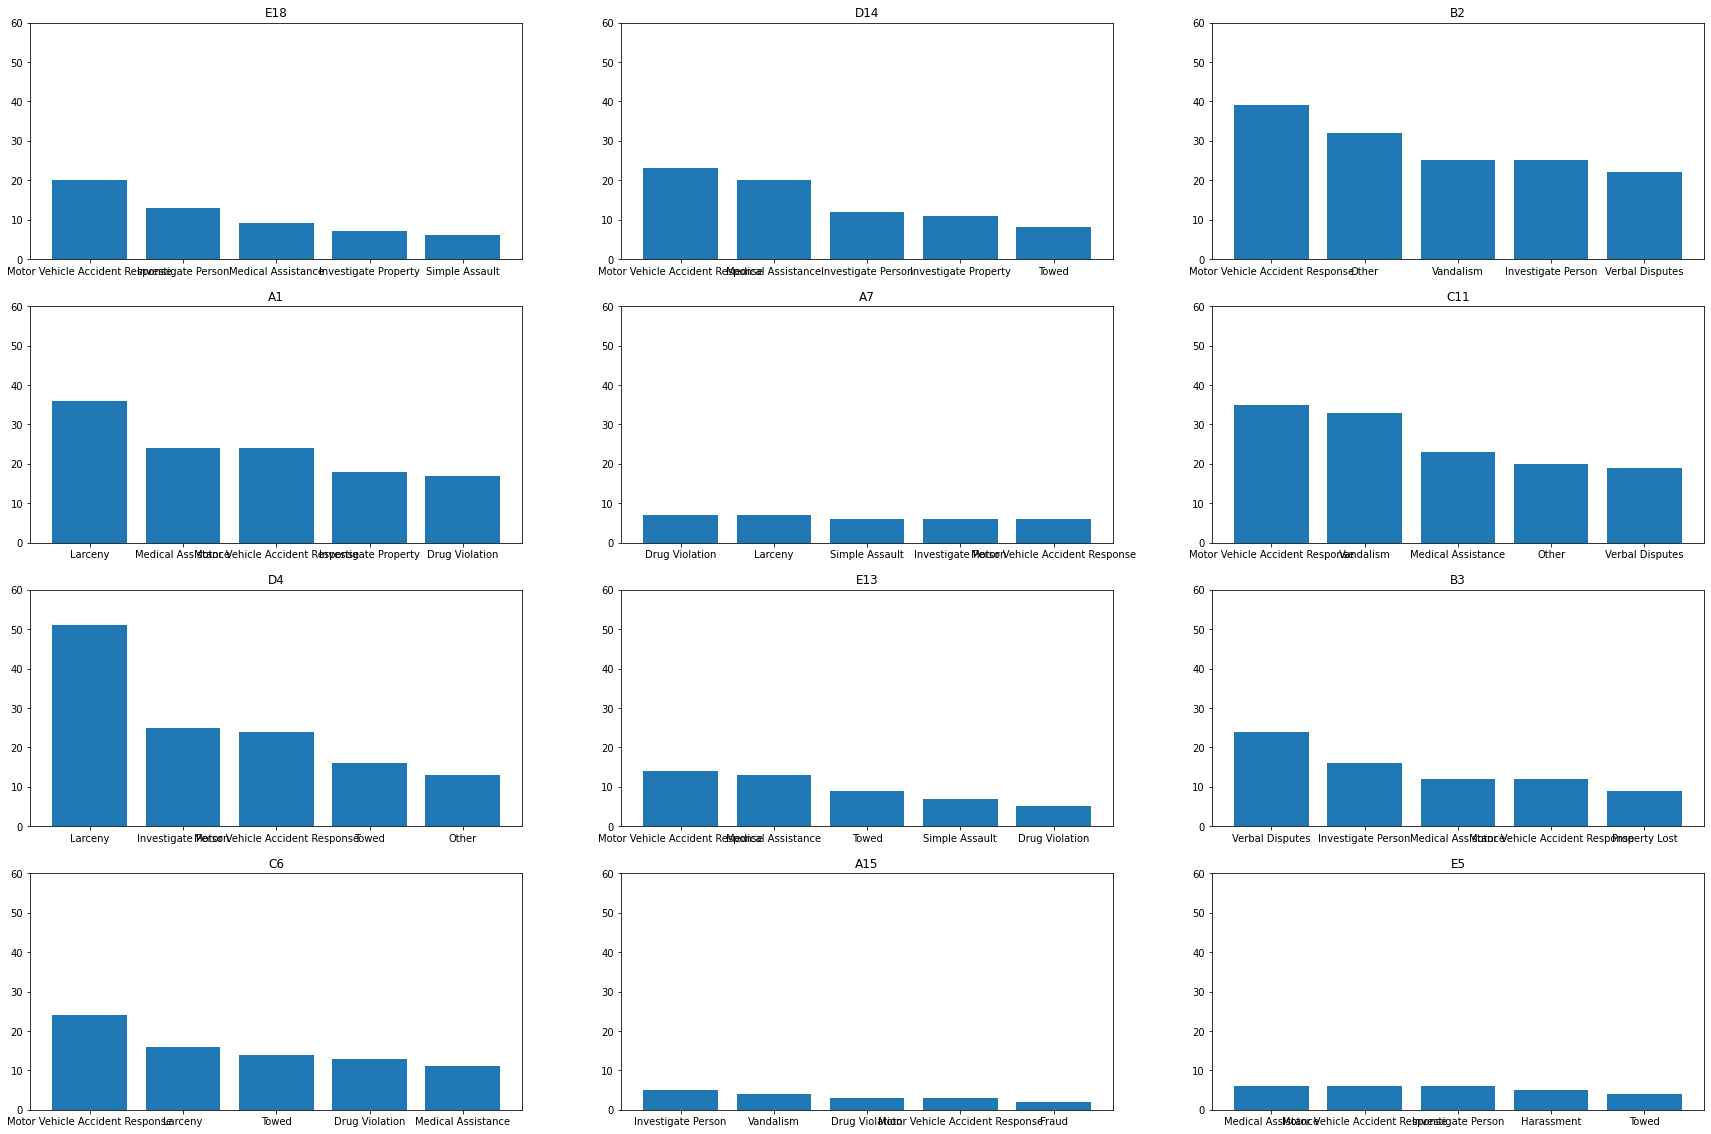

In [144]:
fig = plt.figure(figsize = (30,20))
fig.patch.set_facecolor('xkcd:white')
cpt = 0
for ctd in crime_type_district:
    cpt += 1
    ax = plt.subplot(4,3,cpt)
    ax = plt.ylim(0,60)
    ax = plt.bar(ctd.keys(), ctd.values())
    ax = plt.title(list(districts.keys())[crime_type_district.index(ctd)])

plt.show()

In [136]:
# Which areas of the city have evolved over this time span?
#Prendre les données de chaque district par années et faire un graph qui montre la différence en 2018 et 2015.
crime_district_annee = []
diff_crime_district = []

crime_district2015, districts = get_crime_district(years[0])
print(crime_district2015)
crime_district2018, districts = get_crime_district(years[3])
print(crime_district2018)

for ds in districts:

    diff_crime_district.append(ds)

print(crime_district_annee)




{}
{'A15': 34, 'E5': 54, 'A7': 78, 'E13': 88, 'E18': 116, 'D14': 136, 'C6': 168, 'B3': 186, 'A1': 240, 'C11': 250, 'D4': 266, 'B2': 356}
[{'A15': 34, 'E5': 54, 'A7': 78, 'E13': 88, 'E18': 116, 'D14': 136, 'C6': 168, 'B3': 186, 'A1': 240, 'C11': 250, 'D4': 266, 'B2': 356}, {'A15': 34, 'E5': 54, 'A7': 78, 'E13': 88, 'E18': 116, 'D14': 136, 'C6': 168, 'B3': 186, 'A1': 240, 'C11': 250, 'D4': 266, 'B2': 356}, {'A15': 34, 'E5': 54, 'A7': 78, 'E13': 88, 'E18': 116, 'D14': 136, 'C6': 168, 'B3': 186, 'A1': 240, 'C11': 250, 'D4': 266, 'B2': 356}, {'A15': 34, 'E5': 54, 'A7': 78, 'E13': 88, 'E18': 116, 'D14': 136, 'C6': 168, 'B3': 186, 'A1': 240, 'C11': 250, 'D4': 266, 'B2': 356}, {'A15': 34, 'E5': 54, 'A7': 78, 'E13': 88, 'E18': 116, 'D14': 136, 'C6': 168, 'B3': 186, 'A1': 240, 'C11': 250, 'D4': 266, 'B2': 356}, {'A15': 34, 'E5': 54, 'A7': 78, 'E13': 88, 'E18': 116, 'D14': 136, 'C6': 168, 'B3': 186, 'A1': 240, 'C11': 250, 'D4': 266, 'B2': 356}, {'A15': 34, 'E5': 54, 'A7': 78, 'E13': 88, 'E18': 11

In [ ]:
fig = plt.figure(figsize = (10,10))
fig.patch.set_facecolor('xkcd:white')
cpt = 0
for cda in crime_district_annee:
    cpt += 1
    ax = plt.subplot(2,2,cpt)
    ax = plt.bar(cda.keys(), cda.values())
    ax = plt.title(years_nb[crime_district_annee.index(cda)])

plt.show()

certaines infraction peuvent avoir des corrélation d'autres pas du tout
voir corrélation entre infraction et district
corrélation entre temps et infraction (hivers/été d'une année a l'autre)

ex: aux us, quand il y a une attaque pistolet college lycée -> souvent une autre -> puis pas d'autres pdt un moment
-> passage à l'act

contabiliser non d'incident
voir corrélation entre district -> récupérer données de 2018 -> calcul de corrélation entre 2 districts
10 incident dans le mois de janvier dans district 1 -> aussi district 2 ?
pareil sur corrélation entre mois

calculer coef corrélation entre district sur les mois

différence entre 2015 - 2018 
affiner -> phénomene causant l'augmentation ou diminution -> achat voiture/plus de personne/catastrophe...
ex : crise covid -> 1année où l'utilisation des véhicules a dimuniés